## 5. Clustering

### 1. Importing libraries

### 2. Importing data

### 3. Data cleaning

### 4. Elbow technique

### 5. K-means clustering

#### 1. Importing libraries

In [8]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [9]:
# Getting matplotlib visuals to appear in the notebook
%matplotlib inline

#### 2. Importing data

In [11]:
path = r'C:\Users\Priya\OneDrive\Documents\CareerFoundry\Data Immersion\Achievement 6\Greenhouse Gas Emissions Analysis'

In [12]:
path

'C:\\Users\\Priya\\OneDrive\\Documents\\CareerFoundry\\Data Immersion\\Achievement 6\\Greenhouse Gas Emissions Analysis'

In [13]:
# Importing the greenhouse gas emissions dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'emissions-cleaned.csv'), index_col = False)

Contains public sector information licensed under the Open Government Licence v3.0. License: https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/

#### 3. Data cleaning

In [16]:
# Checking the shape of the dataframe
df.shape

(533016, 16)

In [17]:
# Viewing the first five rows of the dataframe
df.head()

,Unnamed: 0,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [18]:
# Dropping the Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace = True)

In [19]:
# Checking the shape of the dataframe
df.shape

(533016, 15)

In [20]:
# Checking if the Unnamed: 0 column was removed
df.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


In [21]:
# Creating a subset with only numerical columns
df_numerical = df[['Territorial emissions (kt CO2e)', 'CO2 emissions within the scope of influence of LAs (kt CO2)', 'Mid-year Population (thousands)', 'Area (km2)']]

In [22]:
# Viewing the first five rows of df_numerical
df_numerical.head()

,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,1.678178,1.678178,90.457,98.3466
1,0.052700,0.000000,90.457,98.3466
2,0.006770,0.000000,90.457,98.3466
3,0.311375,0.311375,90.457,98.3466
4,0.010500,0.000000,90.457,98.3466


#### 4. Elbow technique

In [24]:
# Defining the range of possible number of clusters in the data and defining the k-means clusters in the range
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [25]:
# Creating and viewing the score
score = [kmeans[i].fit(df_numerical).score(df_numerical) for i in range(len(kmeans))]
score

[-1623143728011.2546,
 -627378282062.6636,
 -202421410881.64374,
 -97426317528.25272,
 -59312758266.60596,
 -46024029639.529396,
 -34317846508.55407,
 -26761701900.42486,
 -24553736076.723133]

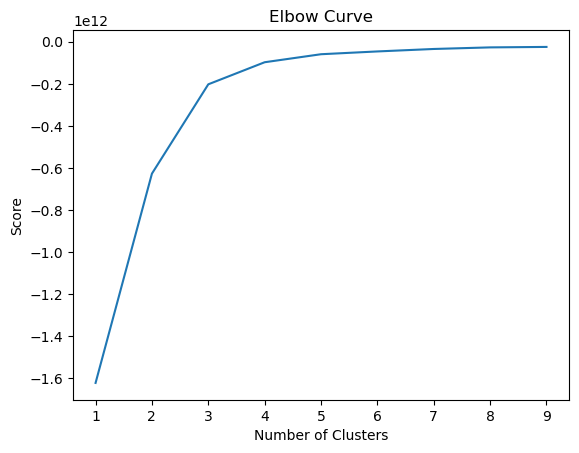

In [26]:
# Plotting the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The number of clusters that will be used in the k-means algorithm is four because there is a decent jump from three to four on the x-axis, but from four onwards, the curve almost straightens out.

#### 5. K-means clustering

In [29]:
# Creating the k-means object
kmeans = KMeans(n_clusters = 4)

In [30]:
# Fitting the k-means object to df_numerical
kmeans.fit(df_numerical)

KMeans(n_clusters=4)

In [31]:
# Creating the clusters column
df_numerical['clusters'] = kmeans.fit_predict(df_numerical)

C:\Users\Priya\AppData\Local\Temp\ipykernel_33180\3397118736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['clusters'] = kmeans.fit_predict(df_numerical)


In [32]:
# Viewing the first five rows of df_numerical
df_numerical.head()

,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2),clusters
0,1.678178,1.678178,90.457,98.3466,0
1,0.052700,0.000000,90.457,98.3466,0
2,0.006770,0.000000,90.457,98.3466,0
3,0.311375,0.311375,90.457,98.3466,0
4,0.010500,0.000000,90.457,98.3466,0


In [33]:
# Checking how many observations fall into each cluster
df_numerical['clusters'].value_counts()

clusters
0    472471
2     47084
3     11967
1      1494
Name: count, dtype: int64

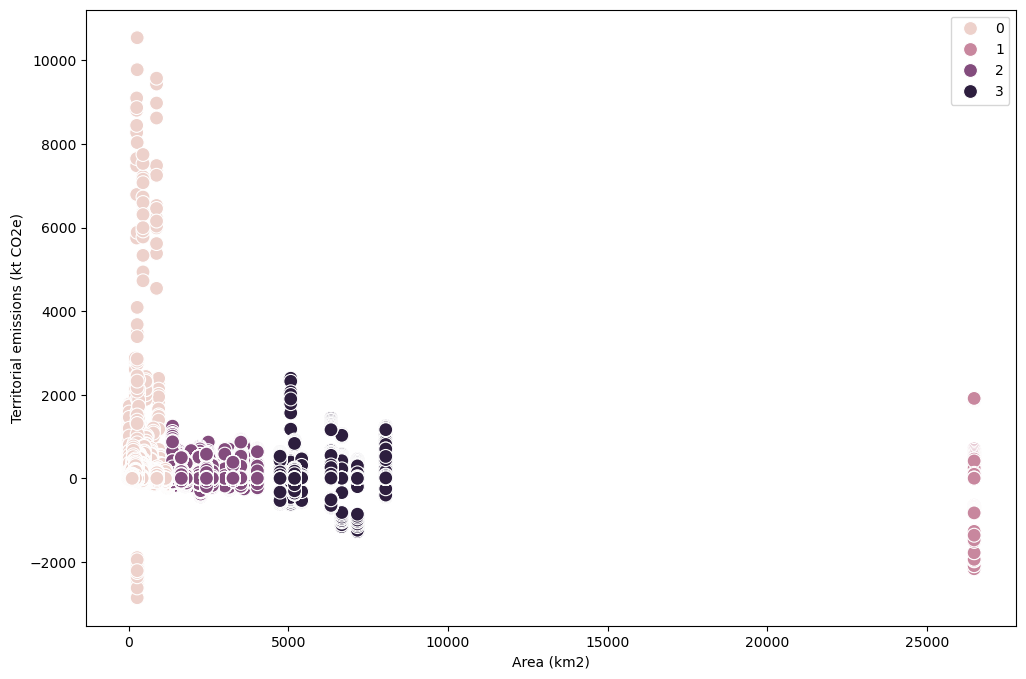

In [34]:
# Creating a scatterplot for Territorial emissions (kt CO2e) and Area (km2)
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['Area (km2)'], y=df_numerical['Territorial emissions (kt CO2e)'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Area (km2)')
plt.ylabel('Territorial emissions (kt CO2e)')
plt.show()

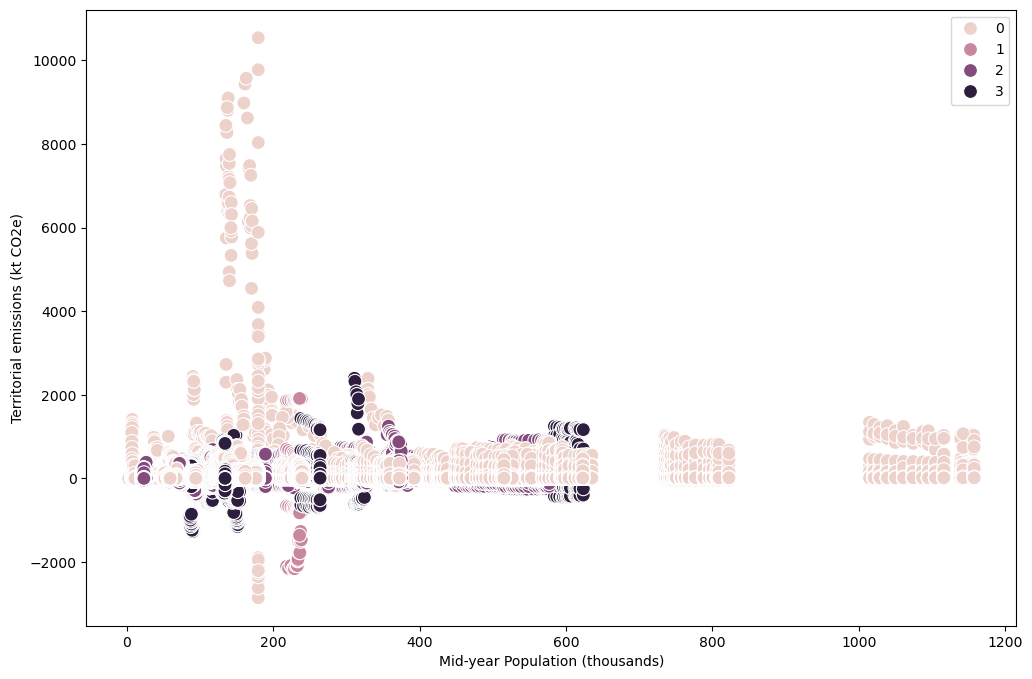

In [35]:
# Creating a scatterplot for Territorial emissions (kt CO2e) and Mid-year Population (thousands)
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['Mid-year Population (thousands)'], y=df_numerical['Territorial emissions (kt CO2e)'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Mid-year Population (thousands)')
plt.ylabel('Territorial emissions (kt CO2e)')
plt.show()

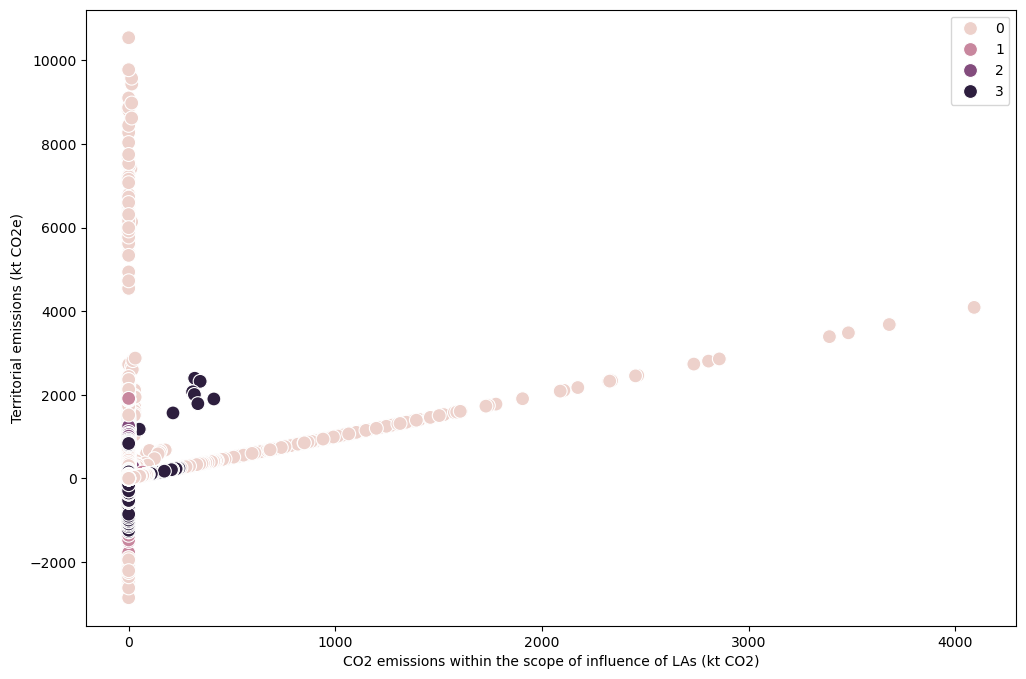

In [36]:
# Creating a scatterplot for Territorial emissions (kt CO2e) and CO2 emissions within the scope of influence of LAs (kt CO2)
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['CO2 emissions within the scope of influence of LAs (kt CO2)'], y=df_numerical['Territorial emissions (kt CO2e)'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('CO2 emissions within the scope of influence of LAs (kt CO2)')
plt.ylabel('Territorial emissions (kt CO2e)')
plt.show()

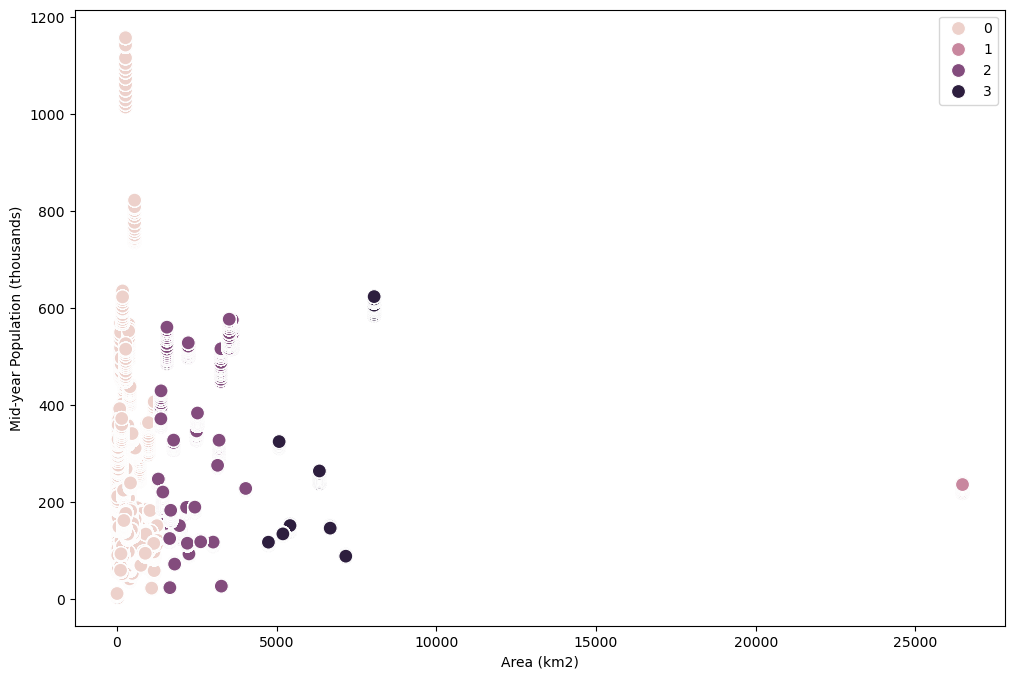

In [37]:
# Creating a scatterplot for Area (km2) and Mid-year Population (thousands)
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numerical['Area (km2)'], y=df_numerical['Mid-year Population (thousands)'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Area (km2)')
plt.ylabel('Mid-year Population (thousands)')
plt.show()

Results:
- Scatterplot 1 (Territorial emissions (kt CO2e) and Area (km2)): This scatterplot shows that local authorities with very small areas (cluster 0) have the highest emissions, local authorities with small areas (cluster 2) have low emissions, local authorities with medium areas (cluster 3) have low and medium emissions, and local authorities with very large areas (cluster 1) have very low to medium emissions. This somewhat makes sense since there could be a higher density of businesses and population in very small areas which leads to higher emissions, and then emissions reduce as the area goes from very small to small due to a reduced density of businesses and population. Once the area becomes medium and very large sized, the emissions increase again, possibly due to the presence of more industrial facilities.
- Scatterplot 2 (Territorial emissions (kt CO2e) and Mid-year Population (thousands)): This scatterplot shows that in cluster 0, the emissions are very high when the population is between 175000 and 200000. For any populations outside the range of 175000-200000 in cluster 0, the emissions are low to medium. In cluster 2, the emissions are low and the mid-year populations range from 0 to 600000. In cluster 1, the emissions are very low to medium and the mid-year populations only range from 200000 to 250000. In cluster 3, the emissions are very low to medium and the mid-year populations only range from 100000 to 600000. This leads to the conclusion that local authorities with populations between 125000 and 200000 have very high emissions, but all other populations only have low to medium emissions.
- Scatterplot 3 (Territorial emissions (kt CO2e) and CO2 emissions within the scope of influence of LAs (kt CO2)): This scatterplot shows that in cluster 2, there are no CO2 emissions, but low to medium territorial emissions. In cluster 1, there are mostly points with no CO2 emissions and very few points with low CO2 emissions and very low to medium territorial emissions. In cluster 0, half the points have no CO2 emissions and half have CO2 emissions. The points with no CO2 emissions have very low to very high territorial emissions, and the points with CO2 emissions have low to medium territorial emissions. In cluster 3, there are some points that have no CO2 emissions and some points that have CO2 emissions. The points with no CO2 emissions have very low to low territorial emissions, and the points with CO2 emissions have low to medium territorial emissions. This makes sense since CO2 is just one of the greenhouse gases that contributes to territorial emissions, so all the points that have no CO2 emissions represent the other greenhouse gases.
- Scatterplot 4 (Area (km2) and Mid-year Population (thousands)): This scatterplot shows that cluster 2 has local authorities with areas between 1000km2 and 4000km2 with low to medium populations. Cluster 1 has local authorities with very high areas, but with a population of around 300000. Cluster 0 has local authorities with low areas of 1000km2 and below, but with populations that range from very low to very high. Cluster 3 has local authorities with areas between 4000km2 and 8000km2, but with populations that range from 100000 to 600000. This leads to the conclusion that as area increases, population decreases.

In [39]:
# Creating categories for the clusters
df_numerical.loc[df_numerical['clusters'] == 3, 'cluster'] = 'dark purple'
df_numerical.loc[df_numerical['clusters'] == 2, 'cluster'] = 'purple'
df_numerical.loc[df_numerical['clusters'] == 1, 'cluster'] = 'pink'
df_numerical.loc[df_numerical['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\Priya\AppData\Local\Temp\ipykernel_33180\296696493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical.loc[df_numerical['clusters'] == 3, 'cluster'] = 'dark purple'


In [40]:
# Calculating descriptive statistics for the clusters
df_numerical.groupby('cluster').agg({'Territorial emissions (kt CO2e)':['mean', 'median'], 
                         'CO2 emissions within the scope of influence of LAs (kt CO2)':['mean', 'median'], 
                         'Mid-year Population (thousands)':['mean', 'median'],
                          'Area (km2)':['mean', 'median']})

Territorial emissions (kt CO2e)            \
                                       mean    median   
cluster                                                 
dark purple                       32.363076  1.637710   
light pink                        15.425687  0.474159   
pink                              34.169581  3.382290   
purple                            29.721675  1.353505   

            CO2 emissions within the scope of influence of LAs (kt CO2)  \
                                                                   mean   
cluster                                                                   
dark purple                                          19.854274            
light pink                                           11.142302            
pink                                                 21.379187            
purple                                               18.373428            

                   Mid-year Population (thousands)                Area (km2)  \
            median                            mean      median          mean   
cluster                                                                        
dark purple    0.0                      227.840398  149.942085   6096.487699   
light pink     0.0                      171.276748  137.099566    318.242033   
pink           0.0                      231.829487  233.411089  26473.949600   
purple         0.0                      245.554860  186.970157   2266.325514   

                         
                 median  
cluster                  
dark purple   6338.1488  
light pink     205.6013  
pink         26473.9496  
purple        2203.8928

The results above can be used for further analyses for each cluster on how area affects territorial emissions. Analyses can be conducted to gather more information and insights from the relationship between territorial emissions and area.

In [72]:
# Exporting df_numerical
df_numerical.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'numerical-cleaned.csv'))